In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
print(df_train.shape,df_test.shape)

(8693, 14) (4277, 13)


In [3]:
#concatting train and test dataset
df_concat=pd.concat([df_train,df_test],axis=0)

In [4]:
df_concat.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [83]:
len(df_train["Cabin"].str.split("/").str[1].unique())

1818

# EDA

### Univariate analysis

In [5]:
df_concat.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


mean>median so data should be right skewed

In [6]:
num_col = df_concat.select_dtypes(include=np.number).columns


C:\Users\harsh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harsh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harsh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

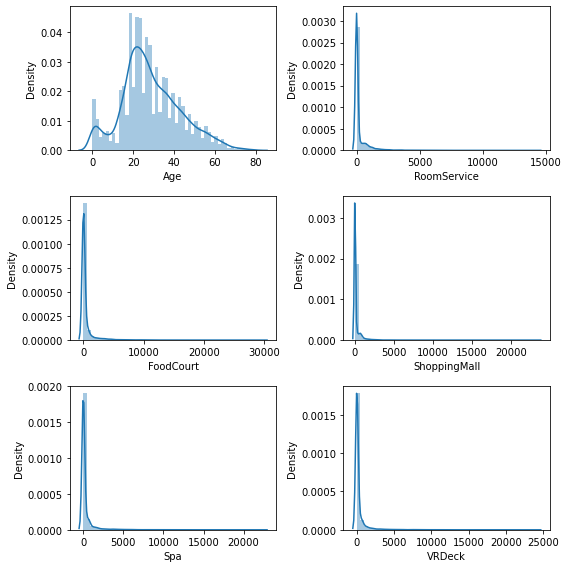

In [7]:
c=1
plt.figure(figsize=(8,8))
for x in num_col:
    plt.subplot(3,2,c)
    sns.distplot(df_concat[x])
    c=c+1
plt.tight_layout()

As we can clearly see all feature except age are highly right skewed
Now applying statistical analysis on age to see its distributionality

In [8]:
print(df_concat.Age.skew())
print(stats.shapiro(df_concat["Age"]))

0.44014976634276876
ShapiroResult(statistic=nan, pvalue=1.0)


C:\Users\harsh\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


as skewness is between 0-0.5 and pvalue of shapiro result is 1 we can say our age is normally distributed

In [9]:
obj_col = df_concat.select_dtypes(include=object).columns

In [10]:
df_concat["Cabin"].value_counts().head(20)

G/734/S     8
G/160/P     8
G/109/P     7
G/1368/P    7
B/201/P     7
E/13/S      7
C/137/S     7
D/273/S     7
F/1194/P    7
F/1411/P    7
B/11/S      7
D/176/S     7
G/748/S     7
E/228/S     7
B/82/S      7
G/1476/S    7
G/981/S     7
C/21/P      7
B/31/P      7
G/737/S     6
Name: Cabin, dtype: int64

C:\Users\harsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\harsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\harsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\harsh\Anaconda3\lib\si

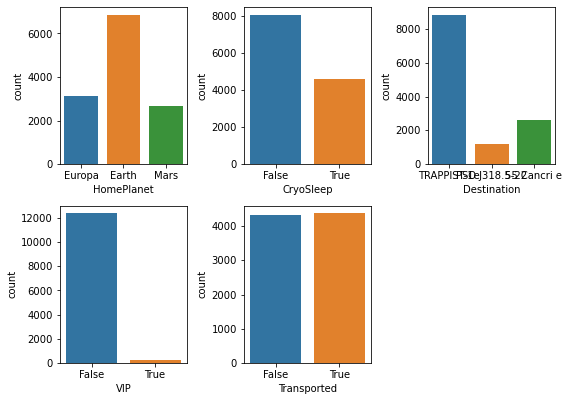

In [11]:
c=1
plt.figure(figsize=(8,8))
for x in obj_col:
    if x=="Name" or x=="PassengerId" or x=="Cabin":
        continue
    else:
        plt.subplot(3,3,c)
        sns.countplot(df_concat[x])
        c=c+1
plt.tight_layout()

Number of people Transported ~ number of people not transported so we are not dealing with imbalanced classification problem

### Bivariate analysis

<AxesSubplot:>

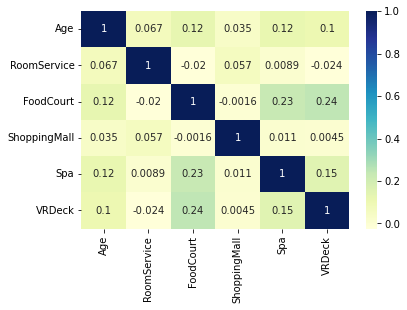

In [12]:
sns.heatmap(df_concat.corr(),annot=True,cmap="YlGnBu")

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

<AxesSubplot:xlabel='HomePlanet'>

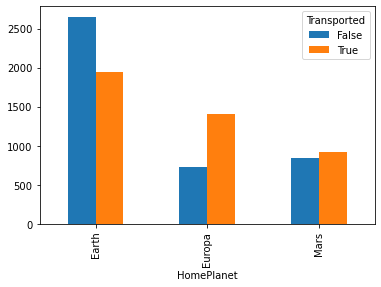

In [13]:
pd.crosstab(df_concat["HomePlanet"],df_concat["Transported"]).plot(kind="bar")

Peoples whose home planet was Europa transported more

<AxesSubplot:xlabel='CryoSleep'>

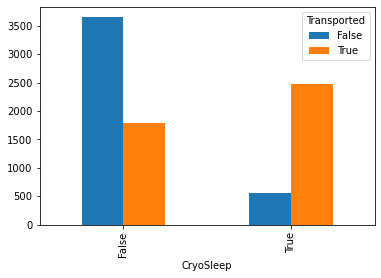

In [14]:
pd.crosstab(df_concat["CryoSleep"],df_concat["Transported"]).plot(kind="bar")

Peoples who were in CryoSleep were Transported

<AxesSubplot:xlabel='Destination'>

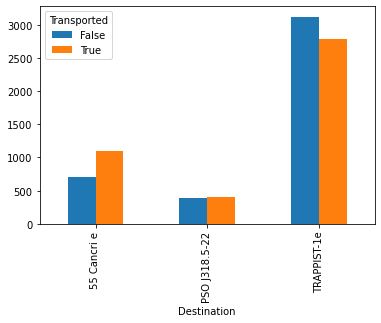

In [15]:
pd.crosstab(df_concat["Destination"],df_concat["Transported"]).plot(kind="bar")

Peoples whos destination where Trappist-le were more so they are more likely to transported

<AxesSubplot:xlabel='VIP'>

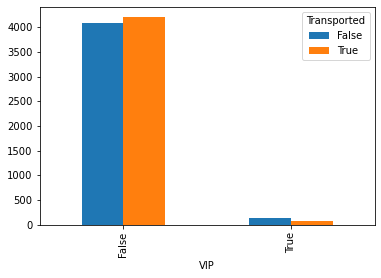

In [16]:
pd.crosstab(df_concat["VIP"],df_concat["Transported"]).plot(kind="bar")

Number of ordinary member are more so there chances transportation are more

In [17]:
print(df_concat.groupby("HomePlanet")["Age"].mean())
print()
print()
print(df_concat.groupby("HomePlanet")["Age"].median())
print()
print()
print(df_concat.groupby("HomePlanet")["Age"].min())
print()
print()
print(df_concat.groupby("HomePlanet")["Age"].max())

HomePlanet
Earth     25.961995
Europa    34.336159
Mars      29.457154
Name: Age, dtype: float64


HomePlanet
Earth     23.0
Europa    33.0
Mars      28.0
Name: Age, dtype: float64


HomePlanet
Earth     0.0
Europa    0.0
Mars      0.0
Name: Age, dtype: float64


HomePlanet
Earth     79.0
Europa    79.0
Mars      76.0
Name: Age, dtype: float64


# Dealing with missing values and Feature Engineering

In [18]:
df_concat.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Extracting some information fom PassengerId

In [19]:
def passengerId(id):
    return (id.split("_")[1])
df_concat["Passenger_id" ]= df_concat["PassengerId"].apply(passengerId)

<AxesSubplot:xlabel='Passenger_id'>

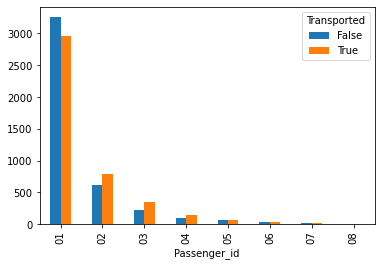

In [20]:
pd.crosstab(df_concat["Passenger_id"],df_concat["Transported"]).plot(kind="bar")

In [21]:
df_concat["Passenger_id"]=df_concat["Passenger_id"].map({"01":8,"02":7,"03":6,"04":5,"05":4,"06":3,"07":2,"08":1})

In [22]:
df_concat["Passenger_id"].dtype

dtype('int64')

Filling Nan values with a cabin no which means not alloted

In [23]:
df_concat["Cabin"].fillna("1/1/1",inplace=True)

Taking some insieght from cabin

In [24]:
def cabin_no(c):
    return (c.split("/")[0])
df_concat["Cabin_No" ]= df_concat["Cabin"].apply(cabin_no)

In [25]:
def cabin_class(c):
    return (c.split("/")[2])
df_concat["Cabin_Class" ]= df_concat["Cabin"].apply(cabin_class)

<AxesSubplot:xlabel='Cabin_No'>

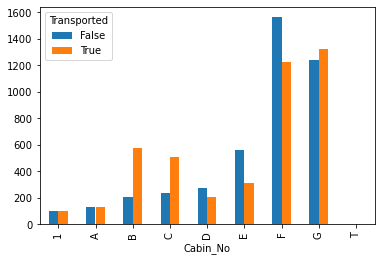

In [26]:
pd.crosstab(df_concat["Cabin_No"],df_concat["Transported"]).plot(kind="bar")

<AxesSubplot:xlabel='Cabin_Class'>

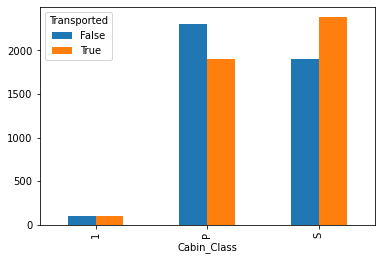

In [27]:
pd.crosstab(df_concat["Cabin_Class"],df_concat["Transported"]).plot(kind="bar")

Filling Nan values of HomePlanet and CyroSleep with mode


In [28]:
df_concat["HomePlanet"].fillna("Earth",inplace=True)
df_concat["CryoSleep"].fillna(df_concat["CryoSleep"].mode(),inplace=True)

Handling Nan values of Destination

In [29]:
df_concat.groupby(["HomePlanet","Destination"]).size()

HomePlanet  Destination  
Earth       55 Cancri e      1037
            PSO J318.5-22    1088
            TRAPPIST-1e      4878
Europa      55 Cancri e      1310
            PSO J318.5-22      29
            TRAPPIST-1e      1737
Mars        55 Cancri e       294
            PSO J318.5-22      67
            TRAPPIST-1e      2256
dtype: int64

In [30]:
df_concat["Destination"].fillna("TRAPPIST-1e",inplace=True)

Handling Nan values of age with home planet

In [31]:
df_concat.groupby(["HomePlanet"])["Age"].median()

HomePlanet
Earth     23.0
Europa    33.0
Mars      28.0
Name: Age, dtype: float64

In [32]:
df_concat.loc[(df_concat.HomePlanet=="Earth") & (df_concat.Age.isnull()) ,"Age"]=23.0

In [33]:
df_concat.loc[(df_concat.HomePlanet=="Europa") & (df_concat.Age.isnull()) ,"Age"]=33.0
df_concat.loc[(df_concat.HomePlanet=="Mars") & (df_concat.Age.isnull()) ,"Age"]=28.0

Handling nan values in VIP

In [34]:
df_concat["VIP"].fillna(df_concat["VIP"].mode(),inplace=True)

Hnadling Numerical Nan values

In [35]:
num_col=num_col.drop("Age")

In [36]:
for x in num_col:
    df_concat[x].fillna(0,inplace=True)

Making all expenses columns into one

In [37]:
df_concat["Expenses"]  = df_concat["RoomService"]+df_concat["FoodCourt"]+df_concat["ShoppingMall"]+df_concat["Spa"]+df_concat["VRDeck"]

In [38]:
df_concat.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Passenger_id', 'Cabin_No', 'Cabin_Class',
       'Expenses'],
      dtype='object')

Dropping some unimportant features

In [39]:
df_concat.drop(["PassengerId","Cabin","Name"],axis=1,inplace=True)

In [40]:
df_concat.drop(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"],axis=1,inplace=True)

In [41]:
df_train_cleaned = df_concat.iloc[0:8693]
df_test_cleaned = df_concat.iloc[8693:].drop("Transported",axis=1)

Feature scaling and Feature Engineering

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_train_cleaned[["Age"]])
df_train_cleaned["Age"] = scaler.transform(df_train_cleaned[["Age"]])
df_test_cleaned["Age"] = scaler.transform(df_test_cleaned[["Age"]])

C:\Users\harsh\AppData\Local\Temp\ipykernel_5204\1475082844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_cleaned["Age"] = scaler.transform(df_train_cleaned[["Age"]])


In [43]:
scaler1 = StandardScaler()
scaler1.fit(df_train_cleaned[["Expenses"]])
df_train_cleaned["Expenses"] = scaler1.transform(df_train_cleaned[["Expenses"]])
df_test_cleaned["Expenses"] = scaler1.transform(df_test_cleaned[["Expenses"]])

C:\Users\harsh\AppData\Local\Temp\ipykernel_5204\33787004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_cleaned["Expenses"] = scaler1.transform(df_train_cleaned[["Expenses"]])


In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_train_cleaned["Transported"])
df_train_cleaned["Transported"] = le.transform(df_train_cleaned["Transported"])


C:\Users\harsh\AppData\Local\Temp\ipykernel_5204\3958354030.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_cleaned["Transported"] = le.transform(df_train_cleaned["Transported"])


In [45]:
df_train_cleaned["Destination"] = df_train_cleaned["Destination"].map({'TRAPPIST-1e':3,'55 Cancri e':2,'PSO J318.5-22':1})
df_test_cleaned["Destination"] = df_test_cleaned["Destination"].map({'TRAPPIST-1e':3,'55 Cancri e':2,'PSO J318.5-22':1})

C:\Users\harsh\AppData\Local\Temp\ipykernel_5204\1688551029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_cleaned["Destination"] = df_train_cleaned["Destination"].map({'TRAPPIST-1e':3,'55 Cancri e':2,'PSO J318.5-22':1})


In [46]:
df_train_transformed = pd.get_dummies(df_train_cleaned,drop_first=True)
df_test_transformed = pd.get_dummies(df_test_cleaned,drop_first=True)

# Model Selection

Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(df_train_transformed.drop("Transported",axis=1),df_train_transformed["Transported"])


RandomForestClassifier()

In [48]:
pred_y = rfc.predict(df_test_transformed)

In [49]:
pred_y=le.inverse_transform(pred_y)

In [50]:
df_submission = df_test["PassengerId"]

In [51]:
df_submission=pd.concat([df_submission,pd.DataFrame(pred_y)],axis=1)


In [52]:
df_submission.columns=["PassengerId","Transported"]

In [53]:
df_submission.to_csv("Rf.csv",index=False)

In [54]:
# Test acuuracy was .6815 
# after handling id and changing it to integer test accuracy become .72

XGB Classifier

In [55]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(df_train_transformed.drop("Transported",axis=1),df_train_transformed["Transported"])
pred_y_xgb = xgb.predict(df_test_transformed)
pred_y_xgb=le.inverse_transform(pred_y_xgb)

In [56]:
df_submission = df_test["PassengerId"]
df_submission=pd.concat([df_submission,pd.DataFrame(pred_y_xgb)],axis=1)
df_submission.columns=["PassengerId","Transported"]
df_submission.to_csv("xgb.csv",index=False)

In [57]:
# Test acuuracy was .6930 and rank 2155
# after handling id and changing it to integer test accuracy become .74187 and rank 1972

GradientBoosting Classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(df_train_transformed.drop("Transported",axis=1),df_train_transformed["Transported"])
pred_y_gbc = gbc.predict(df_test_transformed)
pred_y_gbc = le.inverse_transform(pred_y_gbc)

In [59]:
df_submission = df_test["PassengerId"]
df_submission=pd.concat([df_submission,pd.DataFrame(pred_y_xgb)],axis=1)
df_submission.columns=["PassengerId","Transported"]
df_submission.to_csv("gbc.csv",index=False)

In [60]:
# Test acuuracy was .6930 and rank 2155 same as xgbc
# after handling id and changing it to integer test accuracy become .74187 and rank 1972


In [61]:
#GBC and XGBC have same score

Light GBM

In [62]:
import lightgbm as lgb

In [63]:
clg = lgb.LGBMClassifier()
clg.fit(df_train_transformed.drop("Transported",axis=1),df_train_transformed["Transported"])
pred_y_lgb = clg.predict((df_test_transformed))
pred_y_lgb = le.inverse_transform(pred_y_lgb)

In [64]:
df_submission = df_test["PassengerId"]
df_submission=pd.concat([df_submission,pd.DataFrame(pred_y_lgb)],axis=1)
df_submission.columns=["PassengerId","Transported"]
df_submission.to_csv("lgbm.csv",index=False)

In [65]:
# Test acuuracy was .75286 and rank 1899 better than rf and xgb

## HyperParameter Tunning Light GBM

In [66]:
params = {'learning_rate': [0.2,0.4,0.5,0.6,0.8,0.9,1],'boosting_type':['gbdt', 'dart', 'goss'],'num_leaves':[20,40,50,70,100,130,150,170,200],'max_depth':[5,15,25,40,50,70,100,150,175,200]}

In [67]:
from sklearn.model_selection import GridSearchCV
clf =lgb.LGBMClassifier()

In [68]:
grid_search = GridSearchCV(clf,param_grid=params,scoring="accuracy",cv=5,verbose=1)

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df_train_transformed.drop("Transported",axis=1),df_train_transformed["Transported"],test_size=0.2,random_state=21)

In [70]:
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 1890 candidates, totalling 9450 fits


GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss'],
                         'learning_rate': [0.2, 0.4, 0.5, 0.6, 0.8, 0.9, 1],
                         'max_depth': [5, 15, 25, 40, 50, 70, 100, 150, 175,
                                       200],
                         'num_leaves': [20, 40, 50, 70, 100, 130, 150, 170,
                                        200]},
             scoring='accuracy', verbose=1)

In [71]:
from sklearn.metrics import classification_report
print(grid_search.best_params_)


{'boosting_type': 'dart', 'learning_rate': 0.2, 'max_depth': 5, 'num_leaves': 20}


In [72]:
grid_pred=grid_search.predict(X_test)
print(classification_report(Y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       860
           1       0.81      0.66      0.73       879

    accuracy                           0.75      1739
   macro avg       0.76      0.75      0.75      1739
weighted avg       0.76      0.75      0.75      1739



In [73]:
light_gbm = lgb.LGBMClassifier(boosting_type='dart', learning_rate= 0.2, max_depth= 5, num_leaves= 20)

In [74]:
light_gbm.fit(df_train_transformed.drop("Transported",axis=1),df_train_transformed["Transported"])
pred_y_lgbmT = light_gbm.predict(df_test_transformed)


In [75]:
pred_y_lgbmT = le.inverse_transform(pred_y_lgbmT)
df_submission = df_test["PassengerId"]
df_submission=pd.concat([df_submission,pd.DataFrame(pred_y_lgbmT)],axis=1)
df_submission.columns=["PassengerId","Transported"]
df_submission.to_csv("lgbmT.csv",index=False)

In [76]:
# Accuracy score 0.75683 global rank 1882

## HyperParameter Tunning XGBC

xgbc = XGBClassifier()
params = {"n_estimators":[50,100,200,500,1000,2000],"eta":[0.05,0.1,0.5,0.8],"colsample_bytree":[0.5],"learning_rate":[0.1,0.2,0.5,0.8],"max_depth":[3,5,8,10]}

grid = GridSearchCV(xgbc,params,scoring="accuracy",cv=5,verbose=1)

grid.fit(X_train,Y_train)

print(grid.best_params_)


grid_pred_xgbc=grid_search.predict(X_test)
print(classification_report(Y_test,grid_pred_xgbc))

#same precision,recall,f1-score as light gbm 
# no extra information was found
#going with light Gbm